In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier




- Load dataset using pandas read_csv api in variable df and give file path as path.
- Display first 5 columns of dataframe df.
- Drop the column Unnamed: 0 from the dataframe
- Store all the features(independent values) in a variable called X
- Store the target variable (SeriousDlqin2yrs) in a variable called y
- Calculate the value counts of target variable and store it in variable count
- Split the dataframe into X_train,X_test,y_train,y_test using train_test_split() function. Use test_size = 0.3 and random_state = 6








In [3]:
path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/Financial_Distress_Prediction.csv'

In [4]:
df = pd.read_csv(path)

df.head()
df.shape

df.describe()
df.isna().sum()

df.drop(columns='Unnamed: 0', inplace=True)

X = df.iloc[ : , 1 : ].copy()

y = df.iloc[ : , 0].copy()

count = y.value_counts()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


(150000, 12)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64





- Create variable cols store all the X_train columns in it as a list.
- Create subplot with (nrows = 5 , ncols = 2) and store it in variable's fig ,axes.
- Create for loop to iterate through row.
- Create a nested for loop to access column.
- Create variable col and store value cols[ i * 2 + j] in it
- Scatter plot of each column of X_train should be plotted with respect to SeriousDlqin2yrs
- Check if the feature has outliers visually

[Text(0.5, 1.0, 'Plot of RevolvingUtilizationOfUnsecuredLines against SeriousDlqin2yrs')]

[Text(0.5, 1.0, 'Plot of age against SeriousDlqin2yrs')]

[Text(0.5, 1.0, 'Plot of NumberOfTime30-59DaysPastDueNotWorse against SeriousDlqin2yrs')]

[Text(0.5, 1.0, 'Plot of DebtRatio against SeriousDlqin2yrs')]

[Text(0.5, 1.0, 'Plot of MonthlyIncome against SeriousDlqin2yrs')]

[Text(0.5, 1.0, 'Plot of NumberOfOpenCreditLinesAndLoans against SeriousDlqin2yrs')]

[Text(0.5, 1.0, 'Plot of NumberOfTimes90DaysLate against SeriousDlqin2yrs')]

[Text(0.5, 1.0, 'Plot of NumberRealEstateLoansOrLines against SeriousDlqin2yrs')]

[Text(0.5, 1.0, 'Plot of NumberOfTime60-89DaysPastDueNotWorse against SeriousDlqin2yrs')]

[Text(0.5, 1.0, 'Plot of NumberOfDependents against SeriousDlqin2yrs')]

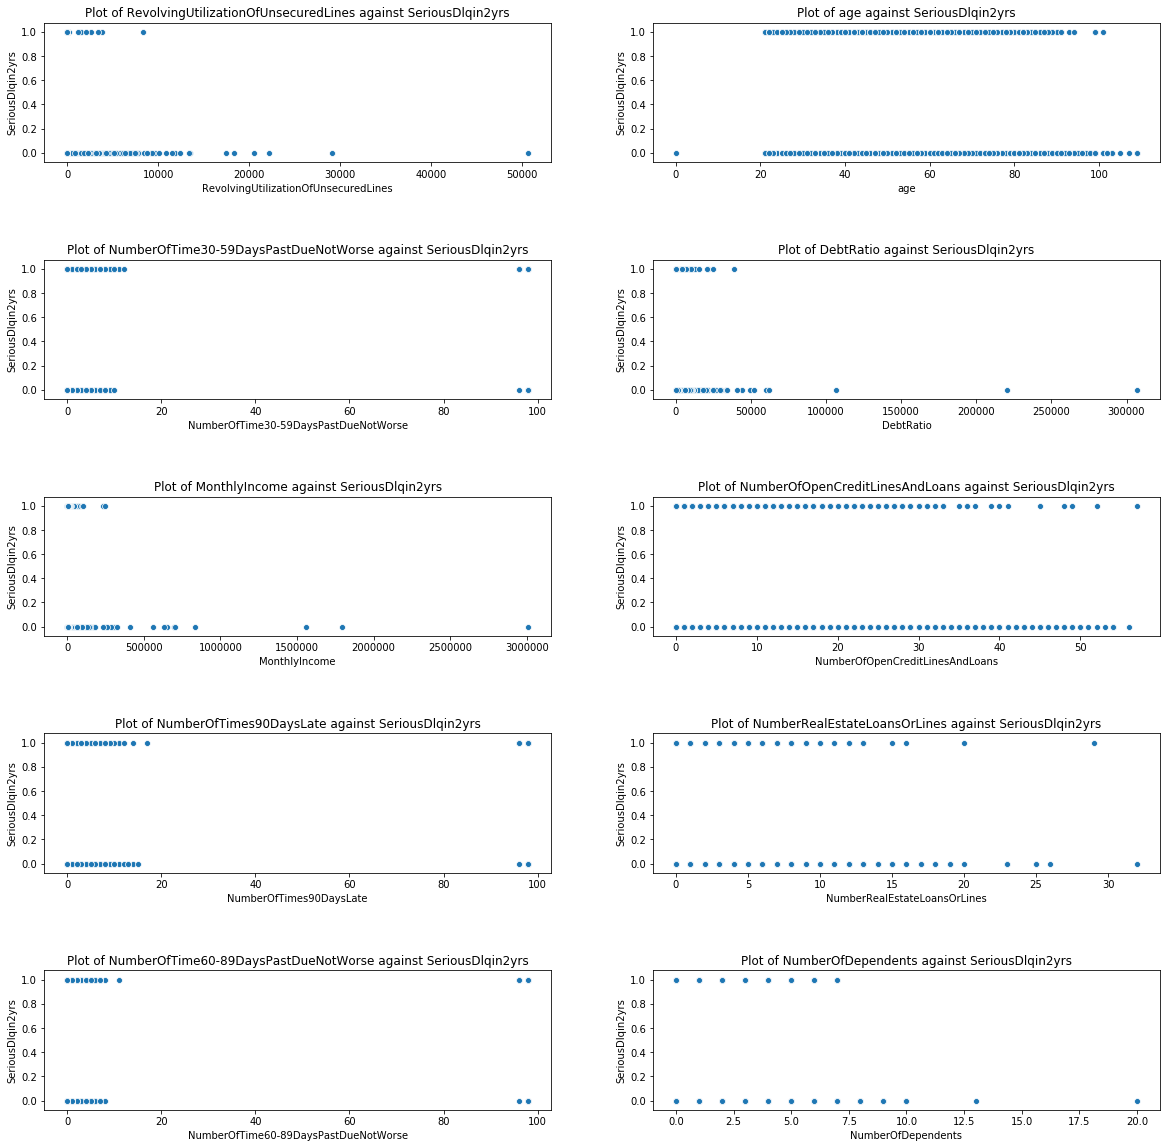

In [5]:
cols = X_train.columns.tolist()
#len(cols)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20,20))
plt.subplots_adjust(hspace=0.7)
for i, j in np.ndindex(axes.shape):
    col = cols[2*i + j]
    sns.scatterplot(x=X_train[col], y=y_train, ax=axes[i, j])
    axes[i, j].set(title='Plot of {} against SeriousDlqin2yrs'.format(col))
plt.show()

In [6]:
X_train.isna().sum()
X_test.isna().sum()

X_train.fillna(X_train.median(), inplace=True)

X_test.fillna(X_test.median(), inplace=True)

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20727
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2722
dtype: int64

RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           9004
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      1202
dtype: int64

/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)





- Store the correlation matrix of X_train in a variable corr.
- Display the heatmap of the correlation matrix using seaborn library.

#  Observation
- As we can see from the heat map that the features NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate and NumberOfTime60-89DaysPastDueNotWorse are highly correlated.

# Feature Selection
- Drop NumberOfTime30-59DaysPastDueNotWorse and NumberOfTime60-89DaysPastDueNotWorse from X_train and X_test as well.

In [7]:
corr = X_train.corr()

<Figure size 1080x720 with 0 Axes>

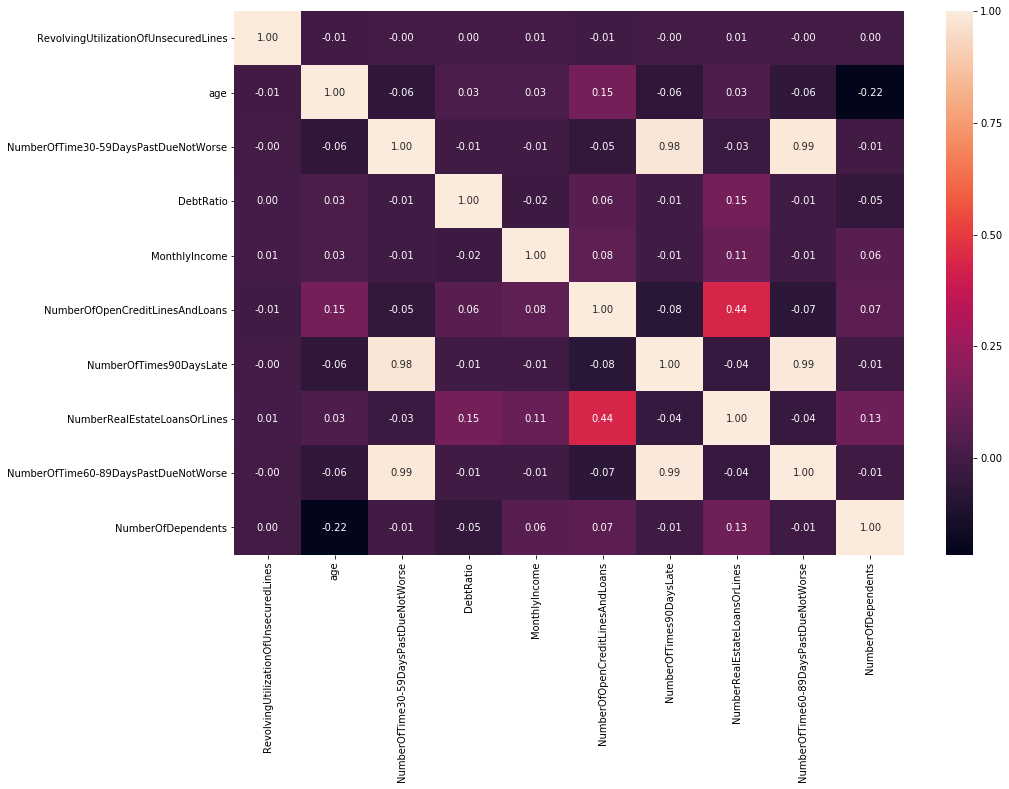

In [8]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt='.2f')

In [9]:
correlated_columns = set()
for col in corr :
    for index in corr.index:
        if col != index:
            if abs(corr[col][index] > 0.9):
                correlated_columns.add(col)

correlated_columns

X_train.drop(columns=['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse'], inplace=True)

X_test.drop(columns=['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse'], inplace=True)




<h3>Scaling the features</h3>
    
While working with the learning model, it is important to scale the features to a range which is centered around zero so that the variance of the features are in the same range. If the feature’s variance is orders of magnitude more than the variance of other features, that particular feature might dominate other features in the dataset and our model will not train well which gives us bad model.

Instructions :
- Instantiate a StandardScaler with StandardScaler() and save it to a variable called 'scaler'.
- Fit and transform it on X_trainand store it in variable X_train.
- Transform it on X_test and store it in variable X_test.

In [14]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)




<h3>Predict the values after building a Machine learning model</h3>

Logistic regression is another technique borrowed by machine learning from the field of statistics.It is the go-to method for binary classification problems (problems with two class values). In this post you will discover the logistic regression algorithm for machine learning.This is a classification problem to predict whether somebody will face financial distress in the next two years. So, here we will train our data on a Logistic regression algorithm and try to correctly predict the class.

<h3>Instructions</h3>

- Instantiate the Logistic regression model in a variable log_reg.
- Fit the model on the training data.
- Store the predicted values based of X_test in a variable called y_pred.
- Check accuracy score and store it in a variable accuracy.

In [18]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = log_reg.score(X_test, y_test)

accuracy




<h3>Is our prediction right?</h3>
Simply, building a predictive model is not your motive. But, creating and selecting a model which gives high accuracy. Hence, it is crucial to check accuracy of the model and we consider different kinds of metrics to evaluate our models. The choice of metric completely depends on the type of model and the implementation plan of the model. After you are finished building your model, these metrics will help you in evaluating your model accuracy.

Instructions
- Calculate the roc_auc_score and store the result in variable score.

- Predict the probability for the X_test == 1 and store the result in y_pred_proba.

- Use metrics.roc_curve to calculate the fpr and tpr and store the result in variables fpr, tpr,.

- Calculate the auc score of y_test and y_pred_proba and store it in variable called auc.

- Plot auc curve of 'auc' using the line plt.plot(fpr,tpr,label="Logistic model, auc="+str(auc)).

- Store the f1_score in variable f1, precision_score in variable precision, recall_score in variable recall and roc_auc_score`` inrocscore`.

- Print the Classification_report and confusion_matrix.

In [24]:
score = roc_auc_score(y_test, y_pred)

y_pred_proba = log_reg.predict_proba(X_test)[: , 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

([<matplotlib.axis.XTick at 0x1a1dd7bf28>,
 <a list of 11 Text xticklabel objects>)

Text(0.5, 0, 'False Positive Rate')

([<matplotlib.axis.YTick at 0x1a1e2520b8>,
 <a list of 11 Text yticklabel objects>)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve Analysis')

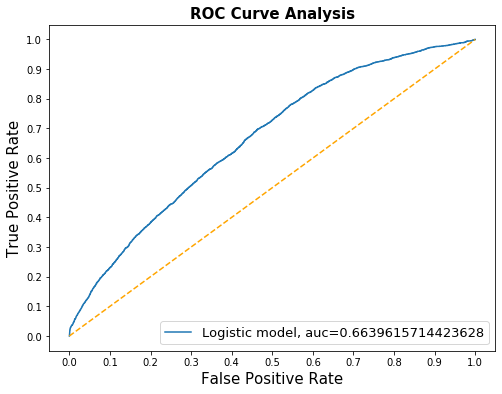

In [39]:
fig = plt.figure(figsize=(8,6))

plt.plot(fpr,tpr,label="Logistic model, auc="+str(auc))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [61]:
f1 = f1_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

rocscore = roc_auc_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.68      0.80     42070
           1       0.12      0.64      0.21      2930

    accuracy                           0.68     45000
   macro avg       0.54      0.66      0.50     45000
weighted avg       0.91      0.68      0.76     45000







<h3>Balancing the dataset</h3>
As we can see that the dataset is not balanced and it shows that 93% of customers will not face financial distress.In this situation, the predictive model developed using conventional machine learning algorithms could be biased and inaccurate.This happens because Machine Learning Algorithms are usually designed to improve accuracy by reducing the error. Thus, they do not take into account the class distribution / proportion or balance of classes. If we train our model on such an imbalanced data we will get incorrect predictions. To overcome this there are different methods such undersampling, oversampling and SMOTE. We will be using the SMOTE technique.Check for different evaluation metrics.

Instructions
- Instantiate a SMOTE with SMOTE(random_state = 9) and save it to a variable called 'smote'.

- Use fit_sample() on X_train , y_train and store it in variable X_sample and y_sample.

- Use the seaborn.countplot() to check the counts of both classes.

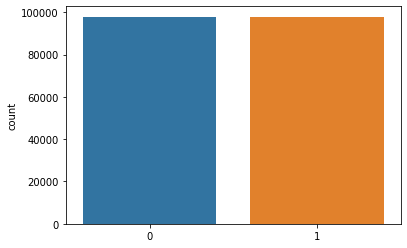

In [53]:
# Check value counts of target variable for data imbalance
count = y.value_counts()


# Instantiate smote
smote = SMOTE(random_state=9)



# Fit Smote on training set
X_sample, y_sample = smote.fit_sample(X_train, y_train)


# Check for count of class

sns.countplot(y_sample)



<h3>Effect of applying SMOTE?</h3>
SMOTE is an over-sampling method. What it does is, it creates synthetic (not duplicate) samples of the minority class. Hence making the minority class equal to the majority class. After applying 'SMOTE' we have balanced the data. We will use this balanced data for training our model and check whether the performance of our model has improved or not by comparing different evaluation parameters.

Instructions
- Fit the logistic regression model on X_sample and y_sample.

- Store the predicted values of X_test in a variable y_pred.

- Calculate the roc_auc_score and store the result in variable score.

- Predict the probability for the X_test == 1 and store the result in y_pred_proba.

- Use metrics.roc_curve to calculate the fpr and tpr and store the result in variables fpr, tpr,.

- Calculate the auc score of y_test and y_pred_proba and store it in variable called auc.

- Plot auc curve of 'auc' using the line plt.plot(fpr,tpr,label="Logistic model, auc="+str(auc)).

- Store the f1_score in variable f1, precision_score in variable precision, recall_score in variable recall and roc_auc_score in rocscore.

- Print the Confusion_matrix and Classification_report

/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

0.6783777777777777

([<matplotlib.axis.XTick at 0x1a223f8ba8>,
 <a list of 11 Text xticklabel objects>)

Text(0.5, 0, 'False Positive Rate')

([<matplotlib.axis.YTick at 0x1a22407668>,
 <a list of 11 Text yticklabel objects>)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve Analysis')

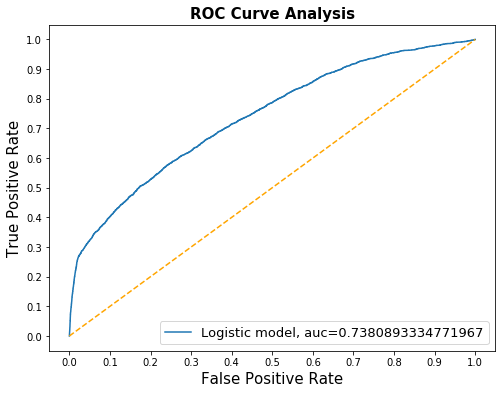

[[28641 13429]
 [ 1044  1886]]
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     42070
           1       0.12      0.64      0.21      2930

    accuracy                           0.68     45000
   macro avg       0.54      0.66      0.50     45000
weighted avg       0.91      0.68      0.76     45000



In [62]:
# Fit logistic regresion model on X_sample and y_sample
log_reg.fit(X_sample, y_sample)



# Store the result predicted in y_pred
y_pred = log_reg.predict(X_test)

accuracy = log_reg.score(X_test, y_test)

accuracy

# Store the auc_roc score

score = roc_auc_score(y_test, y_pred)



# Store the probablity of any class
y_pred_proba = log_reg.predict_proba(X_test)[: , 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

# Plot the auc_roc_graph


fig = plt.figure(figsize=(8,6))

plt.plot(fpr,tpr,label="Logistic model, auc="+str(auc))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()



# Print f1_score,Precision_score,recall_score,roc_auc_score and confusion matrix
f1 = f1_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

rocscore = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))




<h3>Can we improve our model's performance with Random forrest algorithm?</h3>
Random Forrest is a bagging technique which uses Decision Tree as the base model. The performance of our Logistic regression model has signifiacntly improved after balancing the data, lets check can we furthur improve it by using a Random Forrest model.

Instructions
- Instantiate RandomForestClassifier to a variable rf with random_state =9.

- Fit the model on X_sample and y_sample.

- Store the predicted values for X_test in a variable y_pred

- Store the f1_score in variable f1, precision_score in variable precision, recall_score in variable recall and roc_auc_score in rocscore.

- Print the confusion_matrix and classification_report.

- Predict the probability for the X_test == 1 and store the result in y_pred_proba.

- Use metrics.roc_curve to calculate the fpr and tpr and store the result in variables fpr, tpr,.

- Calculate the auc score of y_test and y_pred_proba and store it in variable called auc.

- Plot auc curve of 'auc' using the line plt.plot(fpr,tpr,label="XG Boost model, auc="+str(auc))

In [64]:
rf = RandomForestClassifier(random_state=9)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

0.8874888888888889

([<matplotlib.axis.XTick at 0x1a186828d0>,
 <a list of 11 Text xticklabel objects>)

Text(0.5, 0, 'False Positive Rate')

([<matplotlib.axis.YTick at 0x1a1889f9b0>,
 <a list of 11 Text yticklabel objects>)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve Analysis')

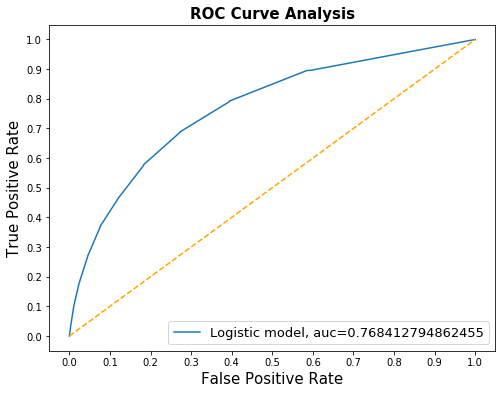

[[38850  3220]
 [ 1843  1087]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     42070
           1       0.25      0.37      0.30      2930

    accuracy                           0.89     45000
   macro avg       0.60      0.65      0.62     45000
weighted avg       0.91      0.89      0.90     45000



In [66]:
# Fit logistic regresion model on X_sample and y_sample
rf.fit(X_sample, y_sample)



# Store the result predicted in y_pred
y_pred = rf.predict(X_test)

accuracy = rf.score(X_test, y_test)

accuracy

# Store the auc_roc score

score = roc_auc_score(y_test, y_pred)



# Store the probablity of any class
y_pred_proba = rf.predict_proba(X_test)[: , 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

# Plot the auc_roc_graph


fig = plt.figure(figsize=(8,6))

plt.plot(fpr,tpr,label="Logistic model, auc="+str(auc))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()



# Print f1_score,Precision_score,recall_score,roc_auc_score and confusion matrix
f1 = f1_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

rocscore = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))